AI/DL LAB Week 2:

Question 1.	Use the TF-Agents & an environment and write a program to implement the environment for a certain number of steps, for a certain number of episodes. Compare and comment on the rewards earned for both approaches and plot the cumulative reward of each game.

Ashwin Saji(240984006)

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("CartPole-v0",render_mode='rgb_array')

C:\Users\mca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [2]:
print("Observation Space:", env.observation_space)
print("Observation Space Shape:", env.observation_space.shape)

Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Observation Space Shape: (4,)


#### Observation space is cart's position, velocity, pole angle, and pole angular velocity

In [3]:
print("Action Space:", env.action_space)
print("Action Space N:", env.action_space.n)

Action Space: Discrete(2)
Action Space N: 2


#### 2 possible actions; 0 is move cart to the left; 1 is move cart to the right

In [4]:
print("Reward Range:", env.reward_range)
state = env.reset()
print("Initial State:", state)

Reward Range: (-inf, inf)
Initial State: (array([-0.00398119,  0.00078467,  0.04365277, -0.02069695], dtype=float32), {})


#### Running 1 step

In [10]:
# state = env.reset()
# action = env.action_space.sample()
# state, reward, done, truncated, info = env.step(action)

# print(f"Action: {action}")
# print(f"Reward: {reward}")
# print(f"Done: {done}")
# print(f"Truncated: {truncated}")
# print(f"Info: {info}")

 ## Implement the CartPole environment for a certain number of steps

Total reward after 1000 steps: 34.0


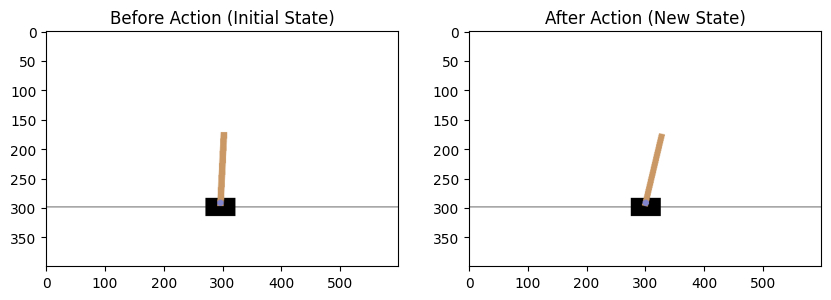

In [6]:
n_steps = 1000

state = env.reset()
initial_frame=env.render()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(initial_frame)
plt.title("Before Action (Initial State)")
total_reward = 0
reward_per_step = []
for step in range(n_steps):

    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)
    total_reward += reward
    reward_per_step.append(total_reward)

    if done:
        break
env.close()
print(f"Total reward after {n_steps} steps: {total_reward}")
new_frame = env.render()
plt.subplot(1, 2, 2)
plt.imshow(new_frame)
plt.title("After Action (New State)")
plt.show()

 ## Implement the CartPole environment for a certain number of episodes

In [7]:
n_episodes = 20
total_reward = 0
episode_rewards = []
for episode in range(n_episodes):
    state = env.reset()
    episode_reward = 0
    done = False
    while not done:
        action = env.action_space.sample()
        state, reward, done, truncated, info = env.step(action)
        episode_reward += reward

    episode_rewards.append(episode_reward)
    print(f"Episode {episode+1} ended with total reward: {episode_reward}")

    total_reward += episode_reward

env.close()

print(f"Total reward after {n_episodes} episodes: {total_reward}")


Episode 1 ended with total reward: 13.0
Episode 2 ended with total reward: 27.0
Episode 3 ended with total reward: 12.0
Episode 4 ended with total reward: 47.0
Episode 5 ended with total reward: 16.0
Episode 6 ended with total reward: 13.0
Episode 7 ended with total reward: 19.0
Episode 8 ended with total reward: 25.0
Episode 9 ended with total reward: 19.0
Episode 10 ended with total reward: 16.0
Episode 11 ended with total reward: 28.0
Episode 12 ended with total reward: 20.0
Episode 13 ended with total reward: 24.0
Episode 14 ended with total reward: 10.0
Episode 15 ended with total reward: 9.0
Episode 16 ended with total reward: 19.0
Episode 17 ended with total reward: 24.0
Episode 18 ended with total reward: 19.0
Episode 19 ended with total reward: 45.0
Episode 20 ended with total reward: 34.0
Total reward after 20 episodes: 439.0


## Compare and comment on the rewards earned for both approaches.

##### In the first approach, the env is run for n steps and the total reward during these steps is relatively low due to the agent not learning and only exploring randomly, leading to many resets within the n steps. The episode ends when the environment reaches a "done" condition (e.g., the pole falls or the cart moves too far)

##### In the second approach, the env is run for n episodes and the total reward varies for each episode but is relatively higer as each episode offers more time for the agent to earn rewards by balancing the pole, despite taking random actions.

 ## Plot the cumulative reward of the games and note down the results.

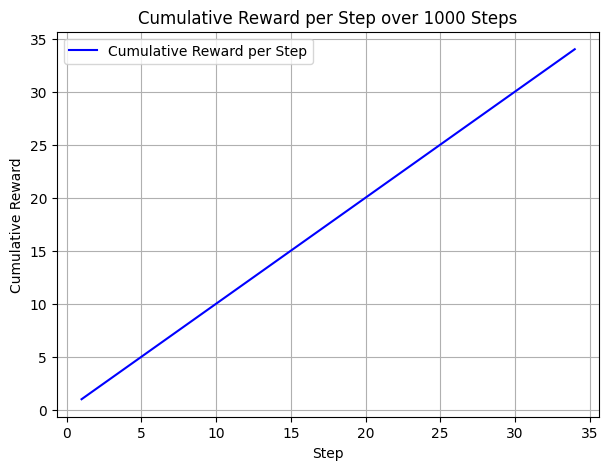

In [8]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(reward_per_step) + 1), reward_per_step, label="Cumulative Reward per Step", color='blue')
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward per Step over 1000 Steps')
plt.grid(True)
plt.legend()

plt.show()

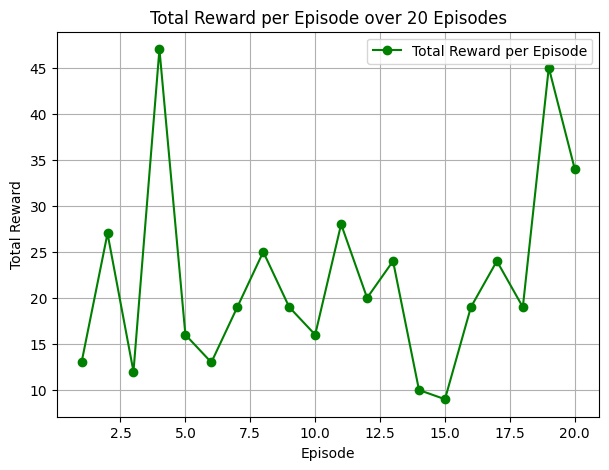

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, n_episodes + 1), episode_rewards, label="Total Reward per Episode", marker='o', color='green')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode over 20 Episodes')
plt.grid(True)
plt.legend()
plt.show()
